In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [3]:
# Define a few important constants that will be used later
epsilon = 0.001
c = 2.99792458E10  # cm / s
sigsb = 5.6704e-5  # erg / cm^2 / s / K^4
h = 6.62607E-27
ang_to_cm = 1e-8
k_B = 1.38064852E-16  # cm^2 * g / s^2 / K


def bbody(lam, T, R):
    '''
    Calculate BB L_lam (adapted from superbol, Nicholl, M. 2018, RNAAS)

    Parameters
    ----------
    lam : float
        Reference wavelengths in Angstroms
    T : float
        Temperature in Kelvin
    R : float
        Radius in cm

    Output
    ------
    L_lam in erg/s/cm
    '''

    lam_cm = np.array(lam) * ang_to_cm
    exponential = (h*c) / (lam_cm*k_B*T)
    blam = ((2.*np.pi*h*c**2) / (lam_cm**5)) / (np.exp(exponential)-1.)
    area = 4. * np.pi * R**2
    lum = blam * area

    return lum

In [2]:
fluxes = [] 
with open('flux', 'r') as f:
    lines = f.readlines()
    for line in lines:
        fluxes.append(float(line.strip()))

In [4]:
wvs = [] 
with open('wl','r') as f:
    lines = f.readlines()
    for line in lines:
        wvs.append(float(line.strip()))

In [5]:
errs = []
with open('full_err', 'r') as f:
    lines = f.readlines()
    for line in lines:
        errs.append(float(line.strip()))

In [11]:
flux_array = np.array(fluxes)
wv_array = np.array(wvs)
errs_array = np.array(errs)


In [12]:
prior_fit = (9000, 1e15)
BBparams, covar = curve_fit(bbody, wv_array, flux_array, 
                            maxfev = 15000, p0 = prior_fit, sigma = errs_array,
                            bounds = (0, [9000, np.inf]) 
                            )

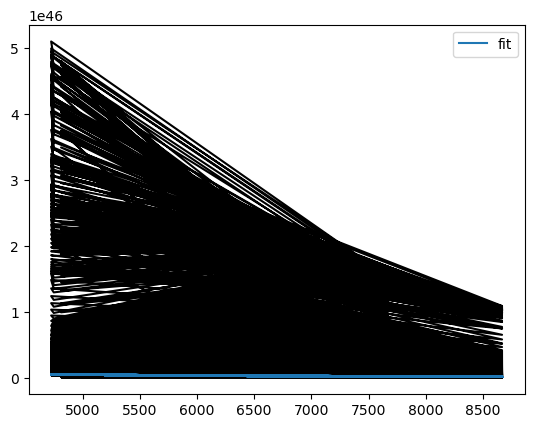

In [13]:
fit_curve = bbody(wv_array, *BBparams)
plt.figure()
plt.plot(wv_array, flux_array, color = 'k')
plt.plot(wv_array, fit_curve, label = 'fit')
plt.legend()
plt.show()